# BioPython-I
## Agenda 
- Sequence processing
- sequence operations
- Reading and writing different file formats
- Sequence annotations

In [92]:
# Load Biopython library & Functions
import Bio
from Bio import SeqIO
from Bio.Seq import Seq, MutableSeq
from Bio.Seq import transcribe, back_transcribe, translate, complement, reverse_complement 

In [2]:
# Check Biopython version 
Bio.__version__

'1.76'

## Sequence Operations

In [19]:
# Sequence 
seq = Seq("GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC")

In [33]:
# Alphabet
seq.alphabet

Alphabet()

In [34]:
# Check type 
type(seq.alphabet)

Bio.Alphabet.Alphabet

In [41]:
# Find sub-sequence: if TRUE <- SubSeq Position, else <- return -1 
seq.find("ATC")

25

In [42]:
seq.find("ATGC")

-1

In [20]:
# Number of `A`
seq.count("A")

26

In [21]:
# Number of `C`
seq.count("C")

35

In [22]:
# Number of `T`
seq.count("T")

30

In [23]:
# Number of `G`
seq.count("G")

14

In [43]:
# K-mer analysis, K = 2(AA)<--dimer
seq.count("AA")

6

In [44]:
# K-mer analysis, K = 3(AAA)<--trimer
seq.count("AAA")

0

In [24]:
# Count frequency of nucleotides 
from collections import Counter
freq = Counter(seq)
print(freq)

Counter({'C': 35, 'T': 30, 'A': 26, 'G': 14})


In [90]:
# Reverse 
print(f'RefSeq: {seq}')
rev = str(seq[::-1])
print(f'RevSeq: {rev}')

RefSeq: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
RevSeq: CTGAGGACGATCTACTTCCCTCTTCTAACAATCCAGGTGACTCTTCAATCCTACTATCCATATTAACCTCTCTCCACCTATTTCCCAAGTCGGACAAGGTCCAGG


In [49]:
# Complement
print(f'RefSeq: {seq}')
com = seq.complement()
print(f'ComSeq: {com}')

RefSeq: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
ComSeq: CCTGGACCTTGTCCGACTTGGGAAATAGGTGGAGAGAGGTTAATATGGATAGTAGGATTGAAGAGTCACCTGGATTGTTAGAAGAGGGAAGTAGATCGTCCTCAG


In [50]:
# Reverse complement 
print(f'RefSeq: {seq}')
rev_com = seq.reverse_complement()
print(f'RevCom: {rev_com}')

RefSeq: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
RevCom: GACTCCTGCTAGATGAAGGGAGAAGATTGTTAGGTCCACTGAGAAGTTAGGATGATAGGTATAATTGGAGAGAGGTGGATAAAGGGTTCAGCCTGTTCCAGGTCC


In [52]:
# Transcription(DNA ==> RNA)
print(f'DNA: {seq}')
rna = seq.transcribe()
print(f'RNA: {rna}')

DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
RNA: GGACCUGGAACAGGCUGAACCCUUUAUCCACCUCUCUCCAAUUAUACCUAUCAUCCUAACUUCUCAGUGGACCUAACAAUCUUCUCCCUUCAUCUAGCAGGAGUC


In [54]:
# Back Transcription(RNA ==> DNA)
print(f'RNA: {rna}')
dna = rna.back_transcribe()
print(f'DNA: {dna}')

RNA: GGACCUGGAACAGGCUGAACCCUUUAUCCACCUCUCUCCAAUUAUACCUAUCAUCCUAACUUCUCAGUGGACCUAACAAUCUUCUCCCUUCAUCUAGCAGGAGUC
DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC


In [55]:
# Translation(DNA ==> Protein)
print(f'DNA: {seq}')
prt = seq.translate()
print(f'Protein: {prt}')

DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
Protein: GPGTG*TLYPPLSNYTYHPNFSVDLTIFSLHLAGV


In [67]:
# Let's varify the protein with length property
len(seq)

105

In [64]:
# Make codons 
len(seq) % 3 

0

In [65]:
# Number of codons 
len(seq) / 3 

35.0

In [66]:
# Now varify the protein length 
len(prt)

35

In [69]:
# Translation(DNA ==> Protein) Stop translation when found stop codon 
print(f'DNA: {seq}')
prt = seq.translate(to_stop=True)
print(f'Protein: {prt}')

DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
Protein: GPGTG


In [71]:
# Translation(DNA ==> Protein) for Mitochondrial DNA 
print(f'DNA: {seq}')
prt = seq.translate(to_stop=True, table=2)
print(f'Protein: {prt}')

DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
Protein: GPGTGWTLYPPLSNYTYHPNFSVDLTIFSLHLAGV


## Handling Files

In [78]:
for seq_record in SeqIO.parse("./dengue/den1.fasta", "fasta"):
    ID = seq_record.id 
    seqs = seq_record.seq[:100]
    rep = repr(seq_record)
    length = len(seq_record)

In [79]:
# ID
print(ID)

NC_001477.1


In [80]:
# Sequence 
print(seqs)

AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAGTTCTAACAGTTTTTTATTAGAGAGCAGATCTCTGATGAAC


In [81]:
# Representation
print(rep)

SeqRecord(seq=Seq('AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAGCTTGCTTA...TCT', SingleLetterAlphabet()), id='NC_001477.1', name='NC_001477.1', description='NC_001477.1 Dengue virus 1, complete genome', dbxrefs=[])


In [82]:
# Length 
print(length)

10735


In [85]:
# Print the first nucleotide of each codon 
seqs[0::3]

Seq('ATTTATAGAAATGTGGTTATTTCTTAAGCATGGC', SingleLetterAlphabet())

In [88]:
# Print the first codon position
seqs[1::3]

Seq('GGACCGCAAAGTACACGTCATAATTTGAATCAA', SingleLetterAlphabet())

In [87]:
# Print the second codon position
seqs[2::3]

Seq('TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA', SingleLetterAlphabet())

In [91]:
# Sequence Length Comparison
seq1 = Seq("TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA")
seq2 = Seq("ATTTATAGAAATGTGGTTATTTCTTAAGCATGGC")
seq1 == seq2

False

In [93]:
# Mutable sequence 
mut_seq = MutableSeq("TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA")
print(f'MutSeq: {mut_seq}')
mut_seq[5] == "C"
print(mut_seq)
mut_seq.remove("T") 
print(mut_seq)
mut_seq.reverse()
print(mut_seq)

MutSeq: TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA
TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA
TGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA
ATTCGGATTTGACGGACTAGACTCGCCGGTGT


In [94]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2020-02-14 00:51:29--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.227.138.112, 13.227.138.154, 13.227.138.175, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.227.138.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K   296KB/s    in 0.7s    

2020-02-14 00:51:31 (296 KB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [95]:
# Working with Fastq files 
for record in SeqIO.parse("SRR835775_1.first1000.fastq", "fastq"):
    print(record)
    
    print(record.seq)
    print(record.letter_annotations['phred_quality'])
    
    

ID: SRR835775.1
Name: SRR835775.1
Description: SRR835775.1 1/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...AAC', SingleLetterAlphabet())
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
[30, 30, 30, 33, 16, 32, 35, 35, 35, 23, 30, 30, 33, 33, 10, 34, 30, 33, 10, 25, 32, 32, 23, 23, 18, 34, 36, 36, 23, 30, 34, 18, 31, 35, 35, 35, 18, 8, 30, 35, 17, 26, 35, 34, 30, 23, 30, 28, 33, 32, 35, 28, 31, 34, 31, 7, 13, 21, 13, 21, 28, 32, 30, 28, 30, 31, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
ID: SRR835775.2
Name: SRR835775.2
Description: SRR835775.2 2/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...ACC', SingleLetterAlphabet())
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA

Seq('TGGGGGAACCAGGGTTTCCCACCAACCACCCTCACTCAGCCTTTTCCCTCCAGG...GCC', SingleLetterAlphabet())
TGGGGGAACCAGGGTTTCCCACCAACCACCCTCACTCAGCCTTTTCCCTCCAGGCATCTCTGGGAAAGGACCTGGGGCTGGTGAGGGGCCCGGAGGAGCC
[31, 31, 34, 37, 35, 31, 16, 35, 37, 39, 37, 39, 39, 40, 37, 39, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 8, 25, 21, 25, 26, 37, 39, 41, 41, 41, 41, 41, 40, 38, 39, 38, 36, 29, 34, 38, 40, 40, 41, 41, 39, 39, 33, 36, 36, 37, 37, 37, 37, 37, 37, 35, 36, 34, 36, 35, 35, 35, 35, 35, 35, 34, 35, 7, 27, 30, 25, 30, 35, 35, 34, 35, 35, 35, 33, 35, 35, 35, 35, 35, 35, 35, 27, 33, 35, 30, 33, 33, 27]
ID: SRR835775.487
Name: SRR835775.487
Description: SRR835775.487 487/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TGGGGGAACCAGGGTTTCCCACCAACCACCCTCACTCAGCCTTTTCCCTCCAGG...GCC', SingleLetterAlphabet())
TGGGGGAACCAGGGTTTCCCACCAACCACCCTCACTCAGCCTTTTCCCTCCAGGCATCTCTGGGAAAGGACCTGGGGCTGGTGAGGTGCCCGGAGGAGCC
[31, 34, 34, 37, 37, 37, 35, 35, 39, 38, 39, 39, 38, 40, 34, 38, 39, 40, 41, 41, 

CCCTGTCACCTCTCACATGTCCCTGCCTAATCTTGCAGGTCCCAGAGAACTACTTCTATGTGCCAGACCTGGGCCAGGTGCCTGAGACTGATGTTCCATC
[31, 30, 31, 35, 33, 37, 35, 35, 37, 37, 39, 37, 39, 41, 41, 40, 41, 40, 38, 39, 40, 32, 38, 38, 40, 40, 38, 37, 38, 38, 38, 40, 36, 39, 38, 41, 40, 40, 41, 40, 39, 40, 40, 40, 36, 38, 38, 36, 37, 39, 40, 40, 34, 39, 40, 41, 41, 38, 40, 40, 38, 39, 38, 38, 40, 41, 40, 40, 36, 39, 38, 40, 38, 35, 32, 30, 36, 36, 34, 33, 33, 35, 36, 32, 34, 34, 36, 35, 35, 35, 35, 34, 34, 26, 34, 35, 35, 32, 34, 34]
ID: SRR835775.991
Name: SRR835775.991
Description: SRR835775.991 991/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TCTGAAACACAAAGTGTGGGGTGTCTAGGGAAGAAGGTGTGTGACCAGGGAGGT...AGA', SingleLetterAlphabet())
TCTGAAACACAAAGTGTGGGGTGTCTAGGGAAGAAGGTGTGTGACCAGGGAGGTCCCCGGCCCAGCTCCCATCCCAGAACCCAGCTCACCTACCTTGAGA
[31, 34, 31, 33, 35, 35, 37, 37, 39, 37, 37, 39, 39, 41, 33, 39, 40, 38, 39, 40, 38, 37, 37, 39, 40, 40, 41, 40, 30, 37, 37, 39, 39, 38, 38, 40, 40, 30, 35, 30, 37, 36, 39

In [96]:
quals = [record.letter_annotations['phred_quality'] for record in SeqIO.parse("SRR835775_1.first1000.fastq", "fastq")]

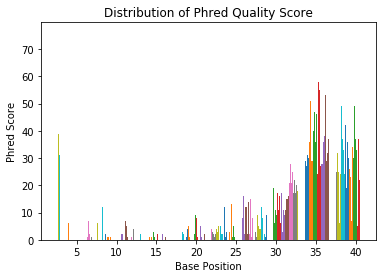

In [106]:
import matplotlib.pyplot as plt 
plt.hist(quals, bins=10)
plt.title("Distribution of Phred Quality Score")
plt.xlabel("Base Position")
plt.ylabel("Phred Score")
plt.show()

In [103]:
sequences = [record.seq for record in SeqIO.parse("SRR835775_1.first1000.fastq", "fastq")]

In [104]:
sequences[:100]

[Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...AAC', SingleLetterAlphabet()),
 Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...ACC', SingleLetterAlphabet()),
 Seq('TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT...AGG', SingleLetterAlphabet()),
 Seq('TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT...TTA', SingleLetterAlphabet()),
 Seq('CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCC...ACC', SingleLetterAlphabet()),
 Seq('AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCC...CAC', SingleLetterAlphabet()),
 Seq('TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGG...ACG', SingleLetterAlphabet()),
 Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...AAA', SingleLetterAlphabet()),
 Seq('AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT...TGG', SingleLetterAlphabet()),
 Seq('TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGG...GGG', SingleLetterAlphabet()),
 Seq('TAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTAACCCT